In [90]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics

In [91]:
df = pd.read_csv("covid_data.csv")

## Listing All the Variables

In [92]:
print(df.shape)
variables = list(df.columns)
print(f"{len(variables)} variables")
variables

(238234, 67)
67 variables


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [110]:
dfmodel2 = df[(df['total_deaths_per_million'].notna()) &
              (df['gdp_per_capita'].notna()) &
              (df['life_expectancy'].notna()) &
              (df['human_development_index'].notna()) &
              (df['total_vaccinations_per_hundred']) & 
              (df['people_fully_vaccinated_per_hundred']) &
             (df['female_smokers'].notna()) & 
             (df['median_age'].notna()) &
             (df['weekly_hosp_admissions'].notna()) &
             (df['new_vaccinations'].notna())]
dfmodel2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
20487,BEL,Europe,Belgium,2021-01-18,679771.0,932.0,2078.286,20472.0,37.0,50.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20488,BEL,Europe,Belgium,2021-01-19,681250.0,1479.0,1989.714,20554.0,82.0,51.429,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20489,BEL,Europe,Belgium,2021-01-20,684256.0,3006.0,2001.000,20572.0,18.0,46.000,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20490,BEL,Europe,Belgium,2021-01-21,686827.0,2571.0,1991.571,20620.0,48.0,46.571,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
20491,BEL,Europe,Belgium,2021-01-22,689271.0,2444.0,2026.000,20675.0,55.0,46.143,...,31.4,NaN,5.64,81.63,0.931,11655923.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224896,USA,North America,United States,2022-11-18,98306861.0,55042.0,44209.286,1077079.0,530.0,346.143,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224897,USA,North America,United States,2022-11-19,98311464.0,4603.0,44149.286,1077090.0,11.0,347.714,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224898,USA,North America,United States,2022-11-20,98314732.0,3268.0,44280.286,1077090.0,0.0,347.571,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
224899,USA,North America,United States,2022-11-21,98357289.0,42557.0,43233.714,1077284.0,194.0,340.857,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [112]:
X = dfmodel2[["gdp_per_capita", "total_cases", "total_deaths_per_million"]]

In [113]:
X.head(5)

,gdp_per_capita,total_cases,total_deaths_per_million
20487,42658.576,679771.0,1756.360
20488,42658.576,681250.0,1763.395
20489,42658.576,684256.0,1764.940
20490,42658.576,686827.0,1769.058
20491,42658.576,689271.0,1773.776


In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x_train = scaler.transform(X)

In [117]:
distortions = []
mapping = {}
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])
    mapping[k] = sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0]

In [118]:
for key, val in mapping.items():
    print(f'{key} : {val}')

1 : 0.6544730183315322
2 : 0.1783810898856695
3 : 0.09985757627562
4 : 0.06025138530310152
5 : 0.03788579090364763
6 : 0.016118060450054792
7 : 0.00656928916203558
8 : 0.003957011976033945
9 : 0.002182308336828198


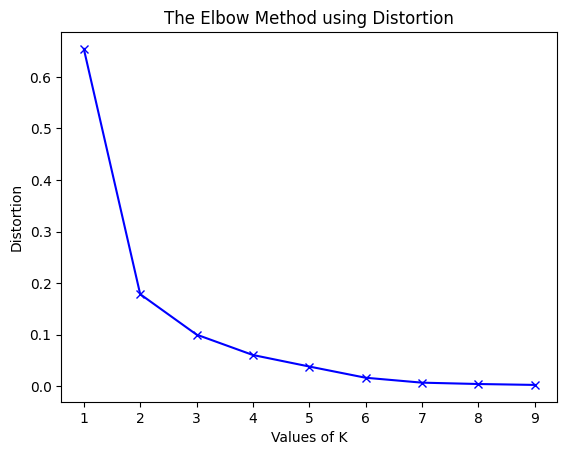

In [119]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [120]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)

KMeans(n_clusters=6)

In [121]:
kmeans.labels_

array([2, 2, 0, 1, 2, 0, 5, 2, 2, 0, 2, 2, 4, 5, 5, 3, 2])

ValueError: 'c' argument has 17 elements, which is inconsistent with 'x' and 'y' with size 9275.

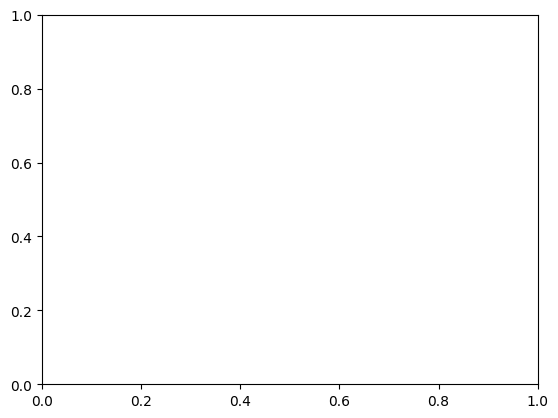

In [122]:
plt.scatter(X['gdp_per_capita'], X['total_cases'], c=kmeans.labels_, cmap='viridis');

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='gdp_per_capita', y='total_cases', z='total_deaths_per_million',
              color=kmeans.labels_)
fig.show()